In [2]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import pydicom as dcm
%matplotlib inline 

In [3]:
#Let's load the tabular data. There are two files:
#Detailed class info;
#Train labels.
class_info_df = pd.read_csv('stage_1_detailed_class_info.csv')
train_labels_df = pd.read_csv('stage_1_train_labels.csv') 

In [4]:
print("Detailed class info -  rows:",class_info_df.shape[0]," columns:", class_info_df.shape[1])
print("Train labels -  rows:",train_labels_df.shape[0]," columns:", train_labels_df.shape[1])

Detailed class info -  rows: 28989  columns: 2
Train labels -  rows: 28989  columns: 6


In [5]:
#Let's explore the two loaded files. We will take out a 5 rows samples from each dataset.
class_info_df.sample(5)

,patientId,class
25092,e112e7bb-4892-4ad6-b3e4-81e68357e109,No Lung Opacity / Not Normal
25379,e36afeec-266a-4aa8-9d47-72fcaa56cf30,No Lung Opacity / Not Normal
26135,e985a3d8-3e61-4589-9b91-d53dad5d3ee1,No Lung Opacity / Not Normal
6971,533523c9-7620-4228-ace4-d060a33061a5,No Lung Opacity / Not Normal
1717,1833bbfb-e89d-42b9-9b13-02fdb6045e5f,Normal


In [6]:
train_labels_df.sample(5)

,patientId,x,y,width,height,Target
22378,ca5c6136-98de-4885-829a-ac8dc00cd00c,NaN,NaN,NaN,NaN,0
10999,736709ff-990d-4ba9-9b21-f9aaf542f5ce,NaN,NaN,NaN,NaN,0
16903,a2bd97e5-986c-4fc7-ae37-c3e2715a4bfe,NaN,NaN,NaN,NaN,0
17681,a887251c-8046-4ff2-b5e5-9ef155ef94a7,597.0,209.0,251.0,568.0,1
4480,3f2bb376-afc0-4bd2-94bf-64b55746917f,597.0,369.0,215.0,95.0,1


In [7]:
#In class detailed info dataset are given the detailed information about the type of positive or negative class associated with a certain patient.
#In train labels dataset are given the patient ID and the window (x min, y min, width and height of the) containing evidence of pneumonia.
#Data Exploration
#Let's explore the data further.

In [8]:
#Let's check missing information in the two datasets.
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(train_labels_df)

,Total,Percent
height,20025,69.077926
width,20025,69.077926
y,20025,69.077926
x,20025,69.077926
Target,0,0.000000
patientId,0,0.000000


In [9]:
missing_data(class_info_df)

,Total,Percent
class,0,0.0
patientId,0,0.0


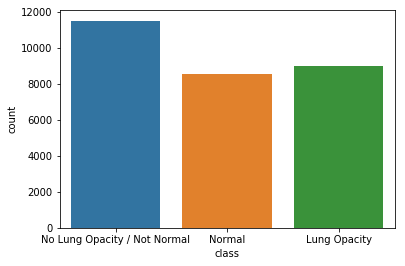

In [10]:
#The percent missing for x,y, height and width in train labels represents the percent of the target 0 (not Lung opacity).
#Let's check the class distribution from class detailed info.
sns.countplot(class_info_df['class'])
plt.show()

In [11]:
#Let's look into more details to the classes.
def get_feature_distribution(data, feature):
    # Get the count for each label
    label_counts = data[feature].value_counts()

    # Get total number of samples
    total_samples = len(data)

    # Count the number of items in each class
    print("Feature: {}".format(feature))
    for i in range(len(label_counts)):
        label = label_counts.index[i]
        count = label_counts.values[i]
        percent = int((count / total_samples) * 10000) / 100
        print("{:<30s}:   {} or {}%".format(label, count, percent))

get_feature_distribution(class_info_df, 'class')

Feature: class
No Lung Opacity / Not Normal  :   11500 or 39.67%
Lung Opacity                  :   8964 or 30.92%
Normal                        :   8525 or 29.4%


In [12]:
#No Lung Opacity / Not Normal and Normal have together the same percent (69.077%) as the percent of missing values for target window in class details information.
#In the train set, the percent of data with value for Target = 1 is therefore 30.92%.

In [13]:
#Merge train and class detail info data
#Let's merge now the two datasets, using Patient ID as the merge criteria.
train_class_df = train_labels_df.merge(class_info_df, left_on='patientId', right_on='patientId', how='inner')
train_class_df.sample(5)

,patientId,x,y,width,height,Target,class
6482,3fa7ddd4-6491-4809-8a46-fdfc6931ca22,119.0,365.0,217.0,244.0,1,Lung Opacity
10314,5b0c3016-c88d-4b19-82f8-bee204b8e12c,594.0,249.0,235.0,517.0,1,Lung Opacity
28105,c81c2feb-efca-4f47-9b09-9d0759957ab5,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
11092,60eb7009-765c-401f-b794-a7f127a38072,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
22404,abc07cd4-2d0f-4ad8-a516-b45d035dadb1,531.0,325.0,221.0,458.0,1,Lung Opacity


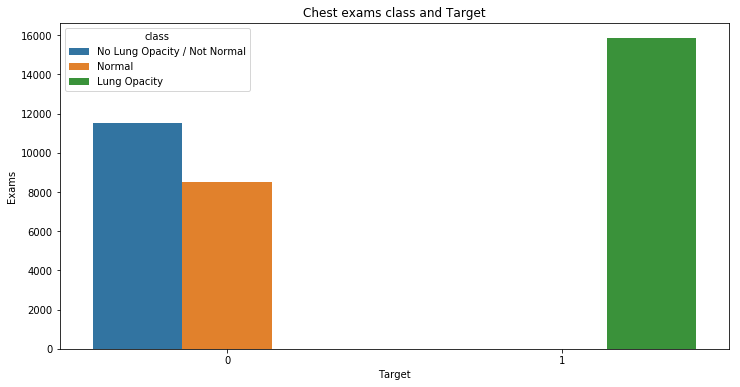

In [14]:
#Target and class
#Let's plot the number of examinations for each class detected, grouped by Target value
fig, ax = plt.subplots(nrows=1,figsize=(12,6))
tmp = train_class_df.groupby('Target')['class'].value_counts()
df = pd.DataFrame(data={'Exams': tmp.values}, index=tmp.index).reset_index()
sns.barplot(ax=ax,x = 'Target', y='Exams',hue='class',data=df)
plt.title("Chest exams class and Target")
plt.show()

In [15]:
#All chest examinations withTarget = 1 (pathology detected) associated with class: Lung Opacity.
#The chest examinations with Target = 0 (no pathology detected) are either of class: Normal or class: No Lung Opacity / Not Normal.

/Users/learny/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/learny/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/learny/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/learny/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 432x288 with 0 Axes>

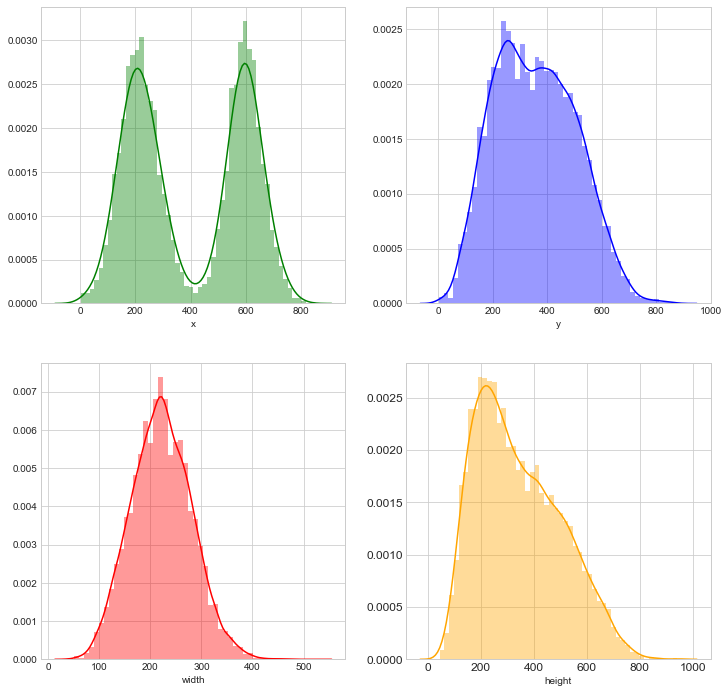

In [36]:
#Detected Lung Opacity window
#For the class Lung Opacity, corresponding to values of Target = 1, we plot the density of x, y, width and height.
target1 = train_class_df[train_class_df['Target']==1]
sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(2,2,figsize=(12,12))
sns.distplot(target1['x'],kde=True,bins=50, color="green", ax=ax[0,0])
sns.distplot(target1['y'],kde=True,bins=50, color="blue", ax=ax[0,1])
sns.distplot(target1['width'],kde=True,bins=50, color="red", ax=ax[1,0])
sns.distplot(target1['height'],kde=True,bins=50, color="orange", ax=ax[1,1])
locs, labels = plt.xticks()
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

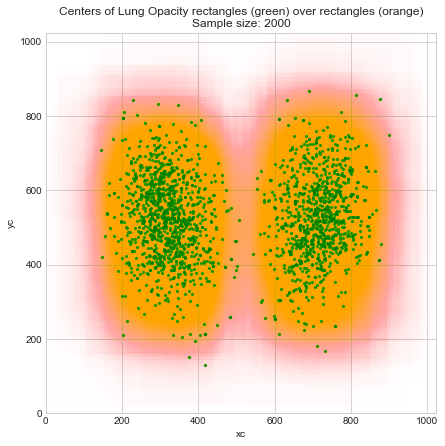

In [19]:
fig, ax = plt.subplots(1,1,figsize=(7,7))
target_sample = target1.sample(2000)
target_sample['xc'] = target_sample['x'] + target_sample['width'] / 2
target_sample['yc'] = target_sample['y'] + target_sample['height'] / 2
plt.title("Centers of Lung Opacity rectangles (green) over rectangles (orange)\nSample size: 2000")
target_sample.plot.scatter(x='xc', y='yc', xlim=(0,1024), ylim=(0,1024), ax=ax, alpha=0.8, marker=".", color="green")
for i, crt_sample in target_sample.iterrows():
    ax.add_patch(Rectangle(xy=(crt_sample['x'], crt_sample['y']),
                width=crt_sample['width'],height=crt_sample['height'],alpha=3.5e-3, color="orange"))
plt.show()


In [20]:
#Let's read the data in the train set.
image_sample_path = os.listdir('stage_1_train_images')[:5]
print(image_sample_path)

['0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm', '00313ee0-9eaa-42f4-b0ab-c148ed3241cd.dcm', '00322d4d-1c29-4943-afc9-b6754be640eb.dcm', '003d8fa0-6bf1-40ed-b54c-ac657f8495c5.dcm', '00436515-870c-4b36-a041-de91049b9ab4.dcm']


In [22]:
#The names of the files are the patients IDs.
#Let's check how many images are in the train and test folders.
image_train_path = ('/stage_1_train_images')
image_test_path = ('/stage_1_test_images')
print("Number of images in train set:", len(image_train_path),"\nNumber of images in test set:", len(image_test_path))

Number of images in train set: 21 
Number of images in test set: 20


In [23]:
#Check duplicates in train dataset
print("Unique patientId in  train_class_df: ", train_class_df['patientId'].nunique())      

Unique patientId in  train_class_df:  25684


In [24]:
tmp = train_class_df.groupby(['patientId','Target', 'class'])['patientId'].count()
df = pd.DataFrame(data={'Exams': tmp.values}, index=tmp.index).reset_index()
tmp = df.groupby(['Exams','Target','class']).count()
df2 = pd.DataFrame(data=tmp.values, index=tmp.index).reset_index()
df2.columns = ['Exams', 'Target','Class', 'Entries']
df2

,Exams,Target,Class,Entries
0,1,0,No Lung Opacity / Not Normal,11500
1,1,0,Normal,8525
2,1,1,Lung Opacity,2481
3,4,1,Lung Opacity,3062
4,9,1,Lung Opacity,105
5,16,1,Lung Opacity,11


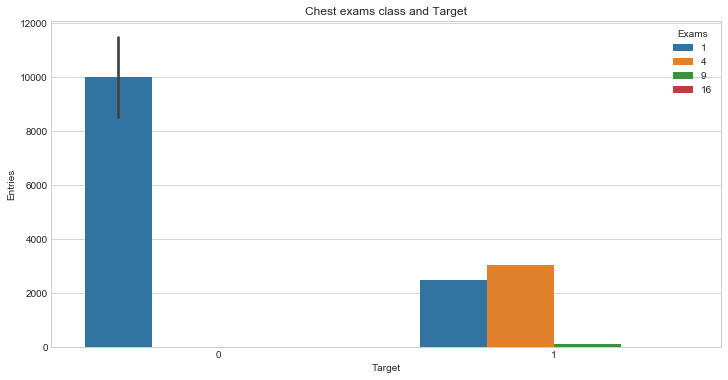

In [25]:
fig, ax = plt.subplots(nrows=1,figsize=(12,6))
sns.barplot(ax=ax,x = 'Target', y='Entries', hue='Exams',data=df2)
plt.title("Chest exams class and Target")
plt.show()

In [26]:
#Metadata
samplePatientID = list(train_class_df[:3].T.to_dict().values())[0]['patientId']
samplePatientID = samplePatientID+'.dcm'
dicom_file_path = os.path.join(PATH,"stage_1_train_images/",samplePatientID)
dicom_file_dataset = dcm.read_file(dicom_file_path)
dicom_file_dataset

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'view: PA'
(0010, 0010) Patient's Name                      PN: '0004cfab-14fd-4e49-80ba-63a80b6bddd6'
(0010, 0020) Patient ID                          LO: '0004cfab-14fd-4e49-80ba-63a80b6bddd6'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'F'
(0010, 1010) Patient'

In [27]:
#We can observe that we do have available some useful information in the DICOM metadata with predictive value, for example:

#Patient sex;
#Patient age;
#Modality;
#Body part examined;
#View position;
#Rows & Columns;
#Pixel Spacing.

In [28]:
#Let's sample few images having the Target = 1.
#Plot DICOM images with Target = 1
def show_dicom_images(data):
    img_data = list(data.T.to_dict().values())
    f, ax = plt.subplots(3,3, figsize=(16,18))
    for i,data_row in enumerate(img_data):
        patientImage = data_row['patientId']+'.dcm'
        imagePath = os.path.join(PATH,"stage_1_train_images/",patientImage)
        data_row_img_data = dcm.read_file(imagePath)
        modality = data_row_img_data.Modality
        age = data_row_img_data.PatientAge
        sex = data_row_img_data.PatientSex
        data_row_img = dcm.dcmread(imagePath)
        ax[i//3, i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i//3, i%3].axis('off')
        ax[i//3, i%3].set_title('ID: {}\nModality: {} Age: {} Sex: {} Target: {}\nClass: {}\nWindow: {}:{}:{}:{}'.format(
                data_row['patientId'],
                modality, age, sex, data_row['Target'], data_row['class'], 
                data_row['x'],data_row['y'],data_row['width'],data_row['height']))
    plt.show()

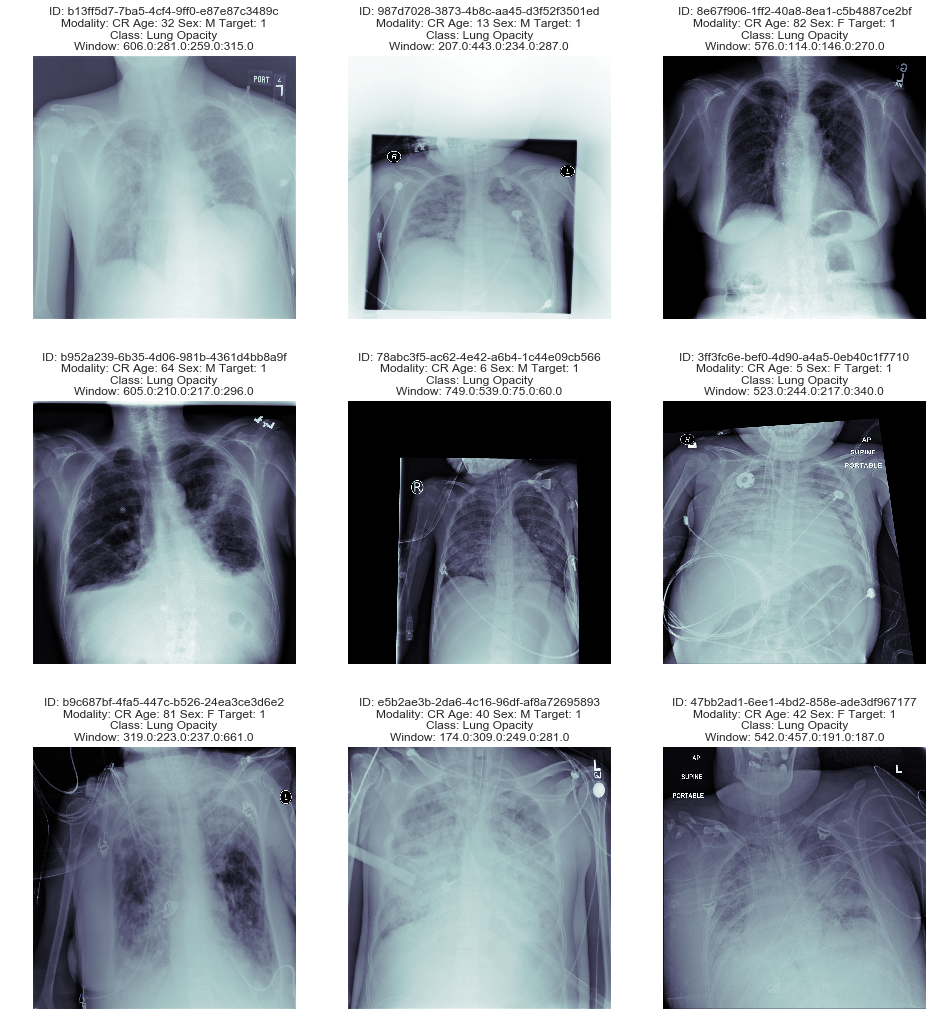

In [29]:
show_dicom_images(train_class_df[train_class_df['Target']==1].sample(9))


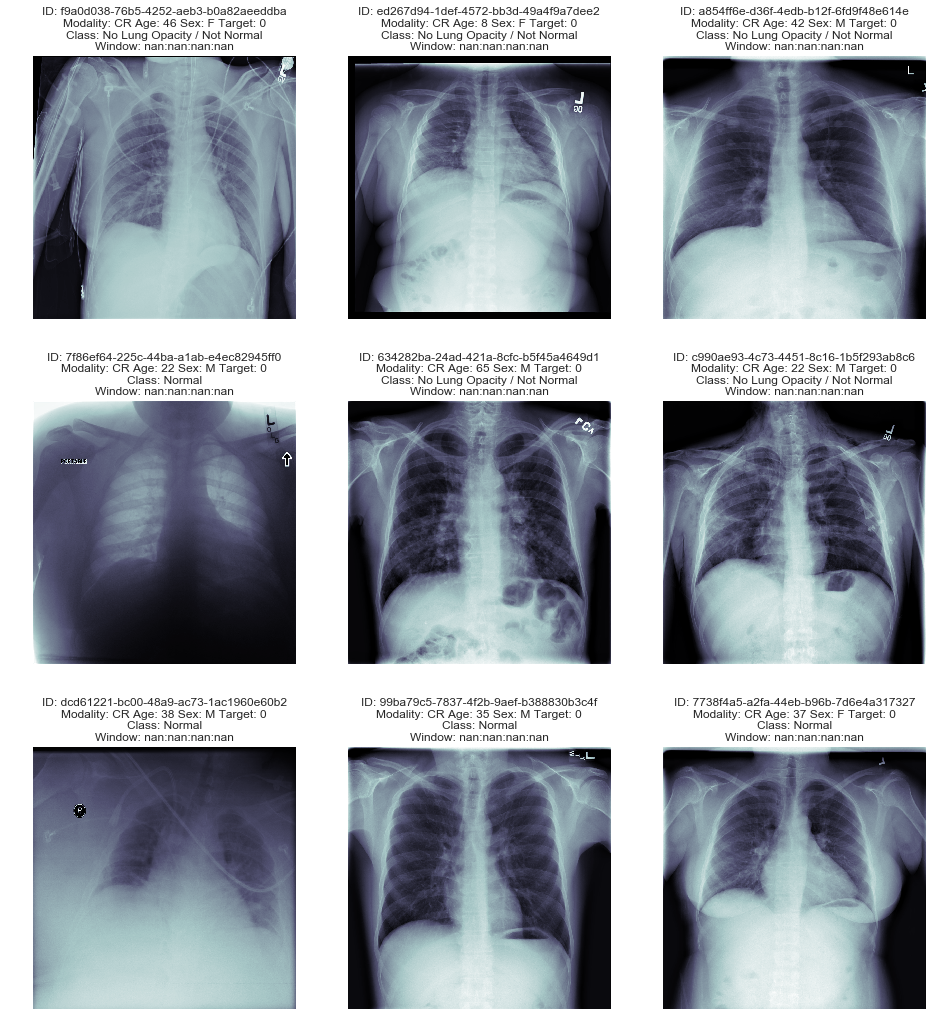

In [30]:
#For some of the images with Target=1, we might see multiple areas (boxes/rectangles) with Lung Opacity.
#Let's sample few images having the Target = 0.
show_dicom_images(train_class_df[train_class_df['Target']==0].sample(9))

In [31]:
#Train data
#We will parse the meta information and add it to the train dataset. We will do the same with the test data.
import time
from contextlib import contextmanager
@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

In [32]:
vars = ['Modality', 'PatientAge', 'PatientSex', 'BodyPartExamined', 'ViewPosition', 'ConversionType', 'Rows', 'Columns', 'PixelSpacing']

def process_dicom_data(data_df, data_path):
    for var in vars:
        data_df[var] = None
    image_names = os.listdir(PATH+data_path)
    for i, img_name in enumerate(image_names):
        imagePath = os.path.join(PATH,data_path,img_name)
        data_row_img_data = dcm.read_file(imagePath)
        idx = (data_df['patientId']==data_row_img_data.PatientID)
        data_df.loc[idx,'Modality'] = data_row_img_data.Modality
        data_df.loc[idx,'PatientAge'] = pd.to_numeric(data_row_img_data.PatientAge)
        data_df.loc[idx,'PatientSex'] = data_row_img_data.PatientSex
        data_df.loc[idx,'BodyPartExamined'] = data_row_img_data.BodyPartExamined
        data_df.loc[idx,'ViewPosition'] = data_row_img_data.ViewPosition
        data_df.loc[idx,'ConversionType'] = data_row_img_data.ConversionType
        data_df.loc[idx,'Rows'] = data_row_img_data.Rows
        data_df.loc[idx,'Columns'] = data_row_img_data.Columns  
        data_df.loc[idx,'PixelSpacing'] = str.format("{:4.3f}",data_row_img_data.PixelSpacing[0]) 

In [33]:
%%time
process_dicom_data(train_class_df,'stage_1_train_images/')

CPU times: user 26min 56s, sys: 24.6 s, total: 27min 20s
Wall time: 33min 8s


In [39]:
#We will create as well a test dataset with similar information.
test_class_df = pd.read_csv('stage_1_sample_submission.csv')

In [40]:
%%time
test_class_df = test_class_df.drop('PredictionString',1)
process_dicom_data(test_class_df,'stage_1_test_images/')\

CPU times: user 21.9 s, sys: 683 ms, total: 22.6 s
Wall time: 32.1 s


In [41]:
#Let's check how many modalities are used. Both train and test set are checked.
print("Modalities: train:",train_class_df['Modality'].unique(), "test:", test_class_df['Modality'].unique())

Modalities: train: ['CR'] test: ['CR']


In [42]:
#Body Part Examined
#Let's check if other body parts than 'CHEST' appears in the data.
print("Body Part Examined: train:",train_class_df['BodyPartExamined'].unique(), "test:", test_class_df['BodyPartExamined'].unique())

Body Part Examined: train: ['CHEST'] test: ['CHEST']


In [43]:
#View Position
print("View Position: train:",train_class_df['ViewPosition'].unique(), "test:", test_class_df['ViewPosition'].unique())

View Position: train: ['PA' 'AP'] test: ['AP' 'PA']


In [44]:
#Train dataset
#Let's get into more details for the train dataset. First, let's check the distribution of PA and AP.
get_feature_distribution(train_class_df,'ViewPosition')

Feature: ViewPosition
AP                            :   20714 or 57.73%
PA                            :   15161 or 42.26%


In [45]:
#Let's check, for the training data presenting Lung Opacity, the distribution of the window for both View Positions. We create a function to represent the distribution of the window centers and windows.
def plot_window(data,color_point, color_window,text):
    fig, ax = plt.subplots(1,1,figsize=(7,7))
    plt.title("Centers of Lung Opacity rectangles over rectangles\n{}".format(text))
    data.plot.scatter(x='xc', y='yc', xlim=(0,1024), ylim=(0,1024), ax=ax, alpha=0.8, marker=".", color=color_point)
    for i, crt_sample in data.iterrows():
        ax.add_patch(Rectangle(xy=(crt_sample['x'], crt_sample['y']),
            width=crt_sample['width'],height=crt_sample['height'],alpha=3.5e-3, color=color_window))
    plt.show()

In [46]:
target1 = train_class_df[train_class_df['Target']==1]

target_sample = target1.sample(2000)
target_sample['xc'] = target_sample['x'] + target_sample['width'] / 2
target_sample['yc'] = target_sample['y'] + target_sample['height'] / 2

target_ap = target_sample[target_sample['ViewPosition']=='AP']
target_pa = target_sample[target_sample['ViewPosition']=='PA']

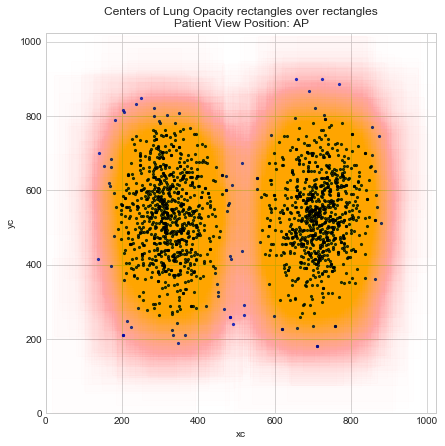

In [47]:
plot_window(target_ap,'blue', 'orange', 'Patient View Position: AP')

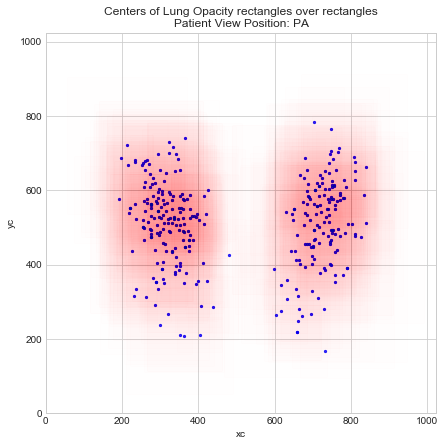

In [48]:
plot_window(target_pa,'blue', 'red', 'Patient View Position: PA')

In [49]:
#Test dataset
#Let's check the distribution of AP and PA positions for the test set.
get_feature_distribution(test_class_df,'ViewPosition')

Feature: ViewPosition
PA                            :   532 or 53.2%
AP                            :   468 or 46.8%


In [52]:
#Conversion Type
#Let's check the Conversion Type data.
print("Conversion Type: train:",train_class_df['ConversionType'].unique(), "test:", test_class_df['ConversionType'].unique())

Conversion Type: train: ['WSD'] test: ['WSD']


In [53]:
#rows and columns
print("Rows: train:",train_class_df['Rows'].unique(), "test:", test_class_df['Rows'].unique())
print("Columns: train:",train_class_df['Columns'].unique(), "test:", test_class_df['Columns'].unique())

Rows: train: [1024] test: [1024]
Columns: train: [1024] test: [1024]


In [54]:
#Patient Age
#Let's examine now the data for the Patient Age for the train set.
tmp = train_class_df.groupby(['Target', 'PatientAge'])['patientId'].count()
df = pd.DataFrame(data={'Exams': tmp.values}, index=tmp.index).reset_index()
tmp = df.groupby(['Exams','Target', 'PatientAge']).count()
df2 = pd.DataFrame(data=tmp.values, index=tmp.index).reset_index()

In [55]:
tmp = train_class_df.groupby(['class', 'PatientAge'])['patientId'].count()
df1 = pd.DataFrame(data={'Exams': tmp.values}, index=tmp.index).reset_index()
tmp = df1.groupby(['Exams','class', 'PatientAge']).count()
df3 = pd.DataFrame(data=tmp.values, index=tmp.index).reset_index()

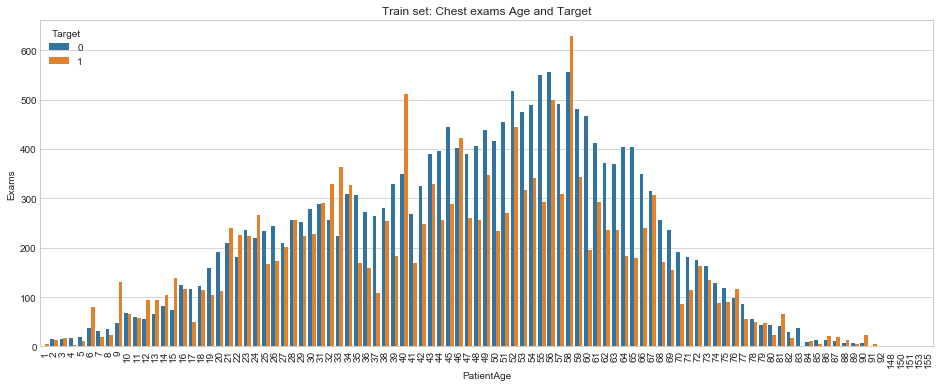

In [56]:
fig, (ax) = plt.subplots(nrows=1,figsize=(16,6))
sns.barplot(ax=ax, x = 'PatientAge', y='Exams', hue='Target',data=df2)
plt.title("Train set: Chest exams Age and Target")
plt.xticks(rotation=90)
plt.show()

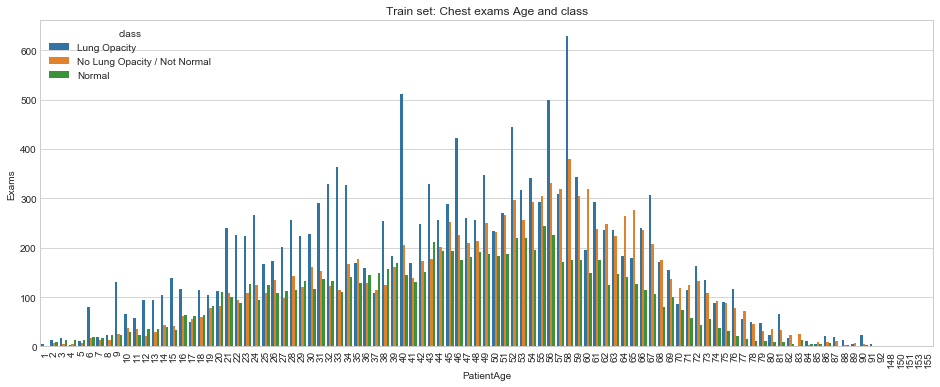

In [57]:
fig, (ax) = plt.subplots(nrows=1,figsize=(16,6))
sns.barplot(ax=ax, x = 'PatientAge', y='Exams', hue='class',data=df3)
plt.title("Train set: Chest exams Age and class")
plt.xticks(rotation=90)
plt.show()

In [58]:
#Let's group the ages in 3 groups (0-19, 20-64 and 65+).
target_age1 = target_sample[target_sample['PatientAge'] < 20]
target_age2 = target_sample[target_sample['PatientAge'] < 65]
target_age3 = target_sample[target_sample['PatientAge'] >= 65]

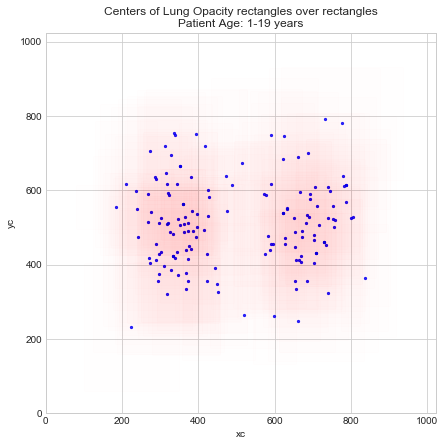

In [59]:
plot_window(target_age1,'blue', 'red', 'Patient Age: 1-19 years')

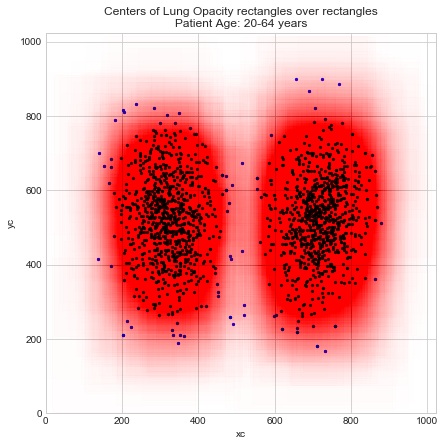

In [60]:
plot_window(target_age2,'blue', 'red', 'Patient Age: 20-64 years')

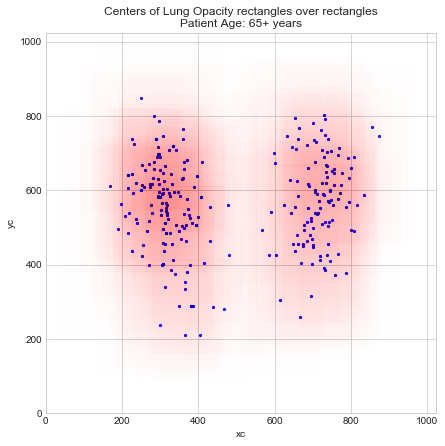

In [61]:
plot_window(target_age3,'blue', 'red', 'Patient Age: 65+ years')

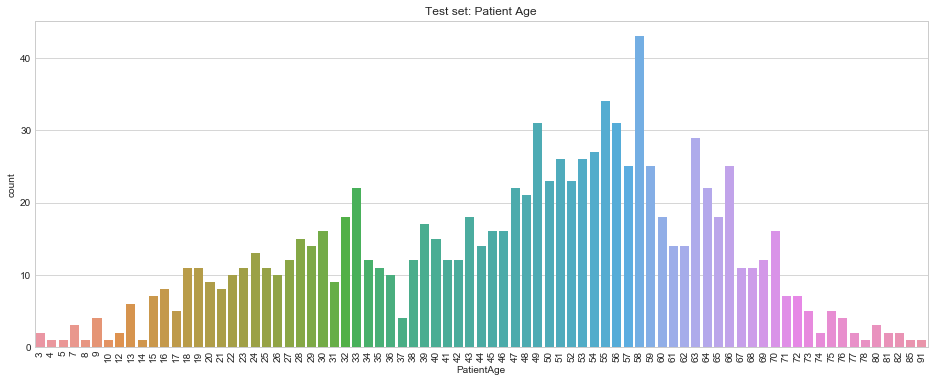

In [62]:
#Let's check also the distribution of patient age for the test data set.
fig, (ax) = plt.subplots(nrows=1,figsize=(16,6))
sns.countplot(test_class_df['PatientAge'], ax=ax)
plt.title("Test set: Patient Age")
plt.xticks(rotation=90)
plt.show()

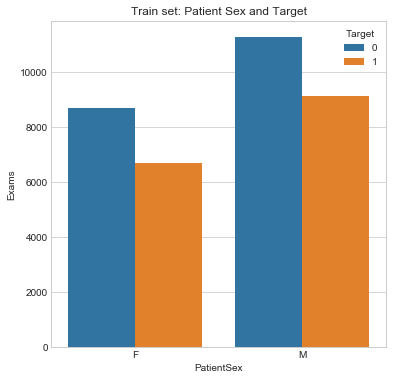

In [64]:
#Let's examine now the data for the Patient Sex.
#We represent the number of Exams for each Patient gender, grouped by value of Target.
tmp = train_class_df.groupby(['Target', 'PatientSex'])['patientId'].count()
df = pd.DataFrame(data={'Exams': tmp.values}, index=tmp.index).reset_index()
tmp = df.groupby(['Exams','Target', 'PatientSex']).count()
df2 = pd.DataFrame(data=tmp.values, index=tmp.index).reset_index()
fig, ax = plt.subplots(nrows=1,figsize=(6,6))
sns.barplot(ax=ax, x = 'PatientSex', y='Exams', hue='Target',data=df2)
plt.title("Train set: Patient Sex and Target")
plt.show()



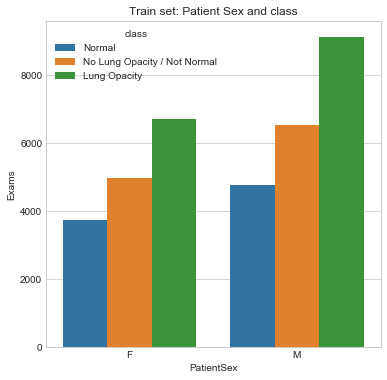

In [65]:
#We represent the number of Exams for each Patient Sex, grouped by value of class.
tmp = train_class_df.groupby(['class', 'PatientSex'])['patientId'].count()
df1 = pd.DataFrame(data={'Exams': tmp.values}, index=tmp.index).reset_index()
tmp = df1.groupby(['Exams','class', 'PatientSex']).count()
df3 = pd.DataFrame(data=tmp.values, index=tmp.index).reset_index()
fig, (ax) = plt.subplots(nrows=1,figsize=(6,6))
sns.barplot(ax=ax, x = 'PatientSex', y='Exams', hue='class',data=df3)
plt.title("Train set: Patient Sex and class")
plt.show()

In [66]:
#Let's plot as well the distribution of window with Lung Opacity, separatelly for the female and male patients. We will reuse the sample with Target = 1 for which we calculated also the center of the window.
target_female = target_sample[target_sample['PatientSex']=='F']
target_male = target_sample[target_sample['PatientSex']=='M']

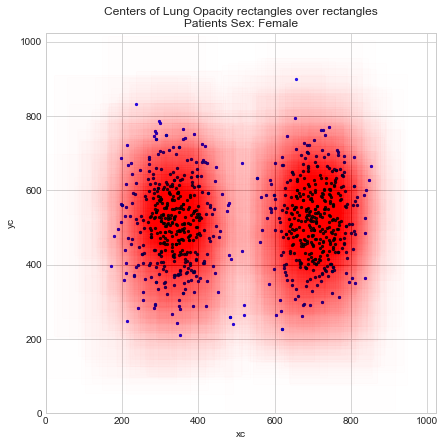

In [68]:
plot_window(target_female,"blue", "red","Patients Sex: Female")

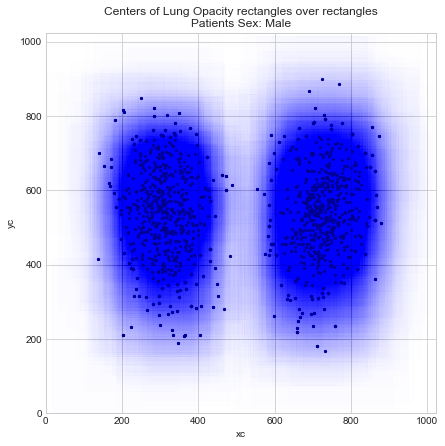

In [69]:
plot_window(target_male,"darkblue", "blue", "Patients Sex: Male")

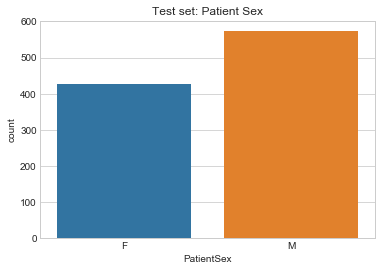

In [70]:
#Test data
sns.countplot(test_class_df['PatientSex'])
plt.title("Test set: Patient Sex")
plt.show()